In [21]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import seaborn as sns
%matplotlib inline

In [17]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns = ['sl', 'sw', 'pl', 'pw'])
y = pd.DataFrame(iris.target)

In [18]:
X.head()

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


## Step 1: Split the set into two sets

"X" will be the data and "Y" will be the class labels

## Step 2: Explore the Data

Next - Let's plot! You can use any plotting library of your choice, but be sure to explore all of the data. 

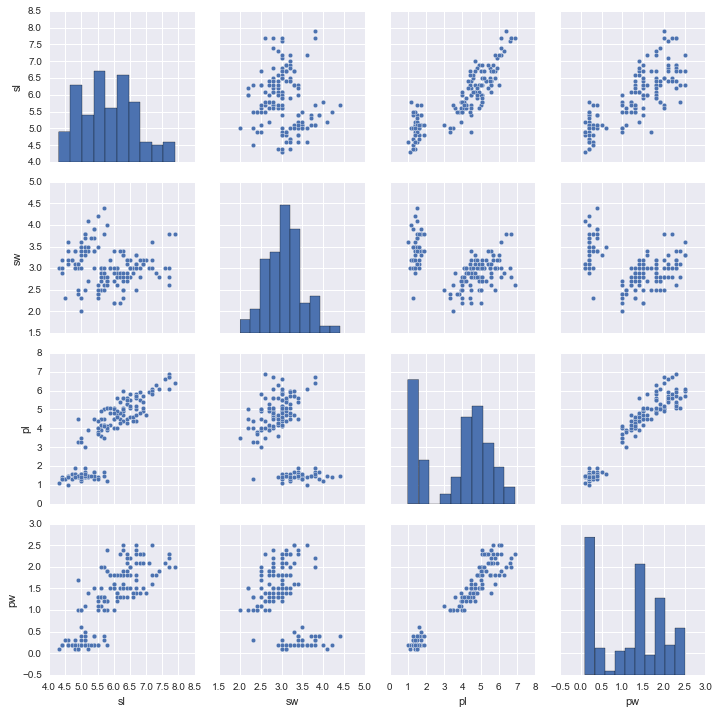

In [22]:
sns.pairplot(X)

## Step 3: Dimensionality Reduction

First, standarize the data. While the Iris data attributes are all measured in the same units (cm), this is a worthwhile step for optimization and good practice for more unruly datasets!

In [23]:
X_standard = StandardScaler().fit_transform(X)

Now, let's set up our data for decomposition by creating a covariance matrix

In [26]:
cov_mat = np.cov(X_standard.T)
cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

Now, decompose the the covariance matrix

In [27]:
eigenValues, eigenVectors = np.linalg.eig(cov_mat)

Check the eigenvalues and eigenvectors

In [28]:
eigenValues

array([ 2.93035378,  0.92740362,  0.14834223,  0.02074601])

In [29]:
eigenVectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

The eigenvectors with the lowest eigenvalues can be dropped RV: let's just keep first two!

In [30]:
eig_pairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in [0, 1]]
eig_pairs.sort()
eig_pairs.reverse()
for i in eig_pairs[:2]:
    print(i[0],i[1])
    print '\n'

(2.9303537755893165, array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105]))


(0.92740362151734157, array([-0.37231836, -0.92555649, -0.02109478, -0.06541577]))




Calculate the explained variance

In [34]:
tot = sum(eigenValues[0:1])
var_exp = [(i / tot)*100 for i in sorted(eigenValues[0:1], reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 100.])

What does the explained variance tell us?

In [39]:
""" Compare with sklearn's PCA method."""
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_standard)
print "The information (explained variance) contained in each principal component: ", pca.explained_variance_ratio_
print '\n'
print(pca.components_[0])
print '\n'
print(pca.components_[1])

The information (explained variance) contained in each principal component:  [ 0.72770452  0.23030523]


[ 0.52237162 -0.26335492  0.58125401  0.56561105]


[-0.37231836 -0.92555649 -0.02109478 -0.06541577]
